In [145]:

import pandas as pd
# Load the data from the URL
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv"
data = pd.read_csv(url)
data.head()

,rownames,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


## Explanatory data and descriptive statistics

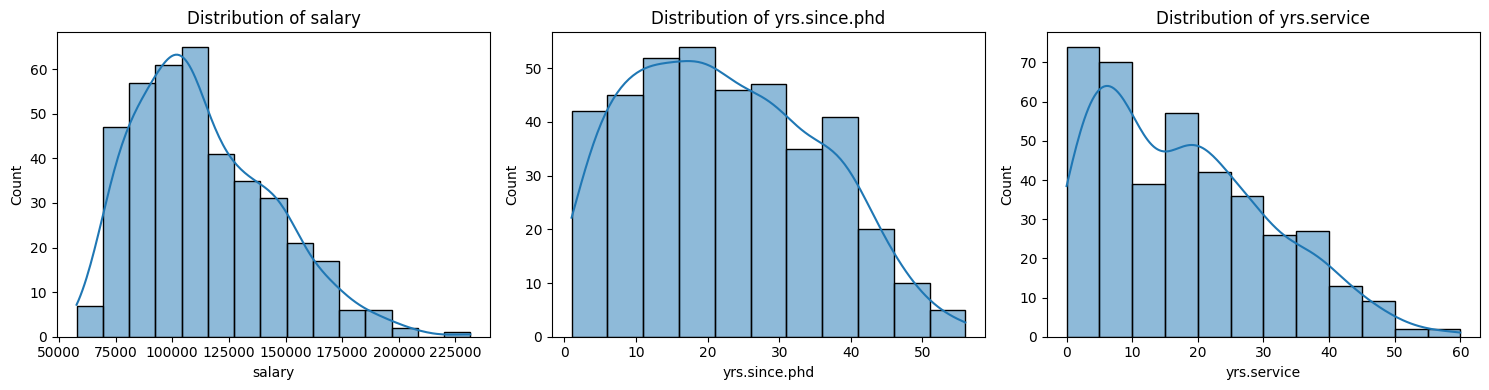

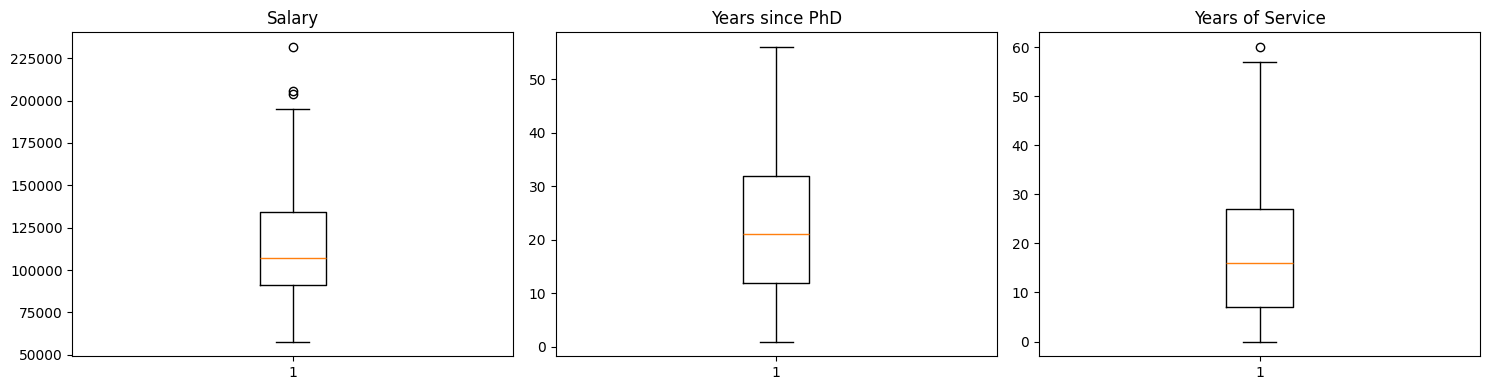

In [125]:

import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(['salary', 'yrs.since.phd', 'yrs.service']):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()

# Boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].boxplot(data['salary'])
axes[0].set_title('Salary')
axes[1].boxplot(data['yrs.since.phd'])
axes[1].set_title('Years since PhD')
axes[2].boxplot(data['yrs.service'])
axes[2].set_title('Years of Service')
plt.tight_layout()
plt.show()

rank
Prof         266
AsstProf      67
AssocProf     64
Name: count, dtype: int64

Discipline:
discipline
B    216
A    181
Name: count, dtype: int64

Sex:
sex
Male      358
Female     39
Name: count, dtype: int64


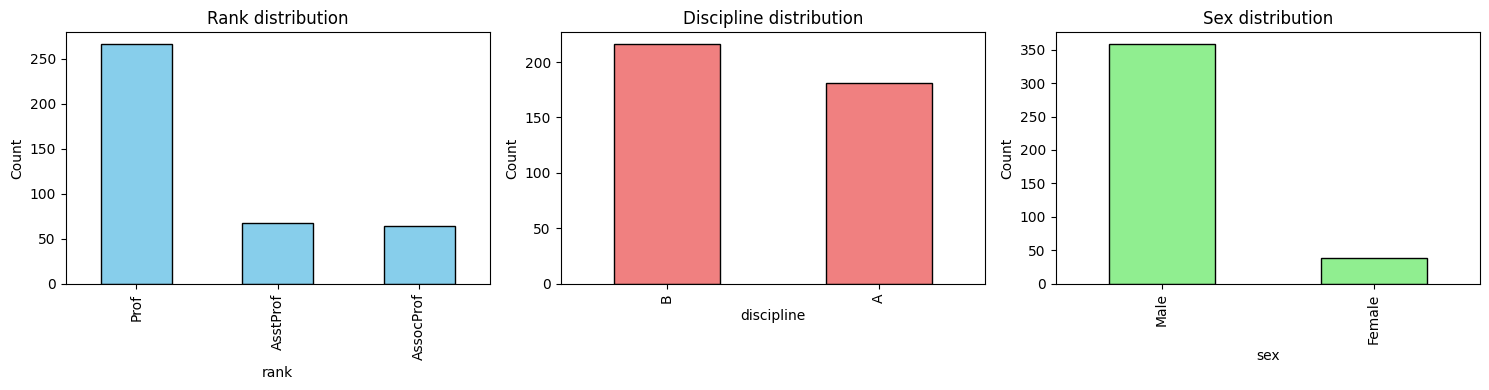

In [126]:
# Numbers
print(data['rank'].value_counts())

print("\nDiscipline:")
print(data['discipline'].value_counts())

print("\nSex:")
print(data['sex'].value_counts())

# Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

data['rank'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Rank distribution')
axes[0].set_ylabel('Count')

data['discipline'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title('Discipline distribution')
axes[1].set_ylabel('Count')

data['sex'].value_counts().plot(kind='bar', ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_title('Sex distribution')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

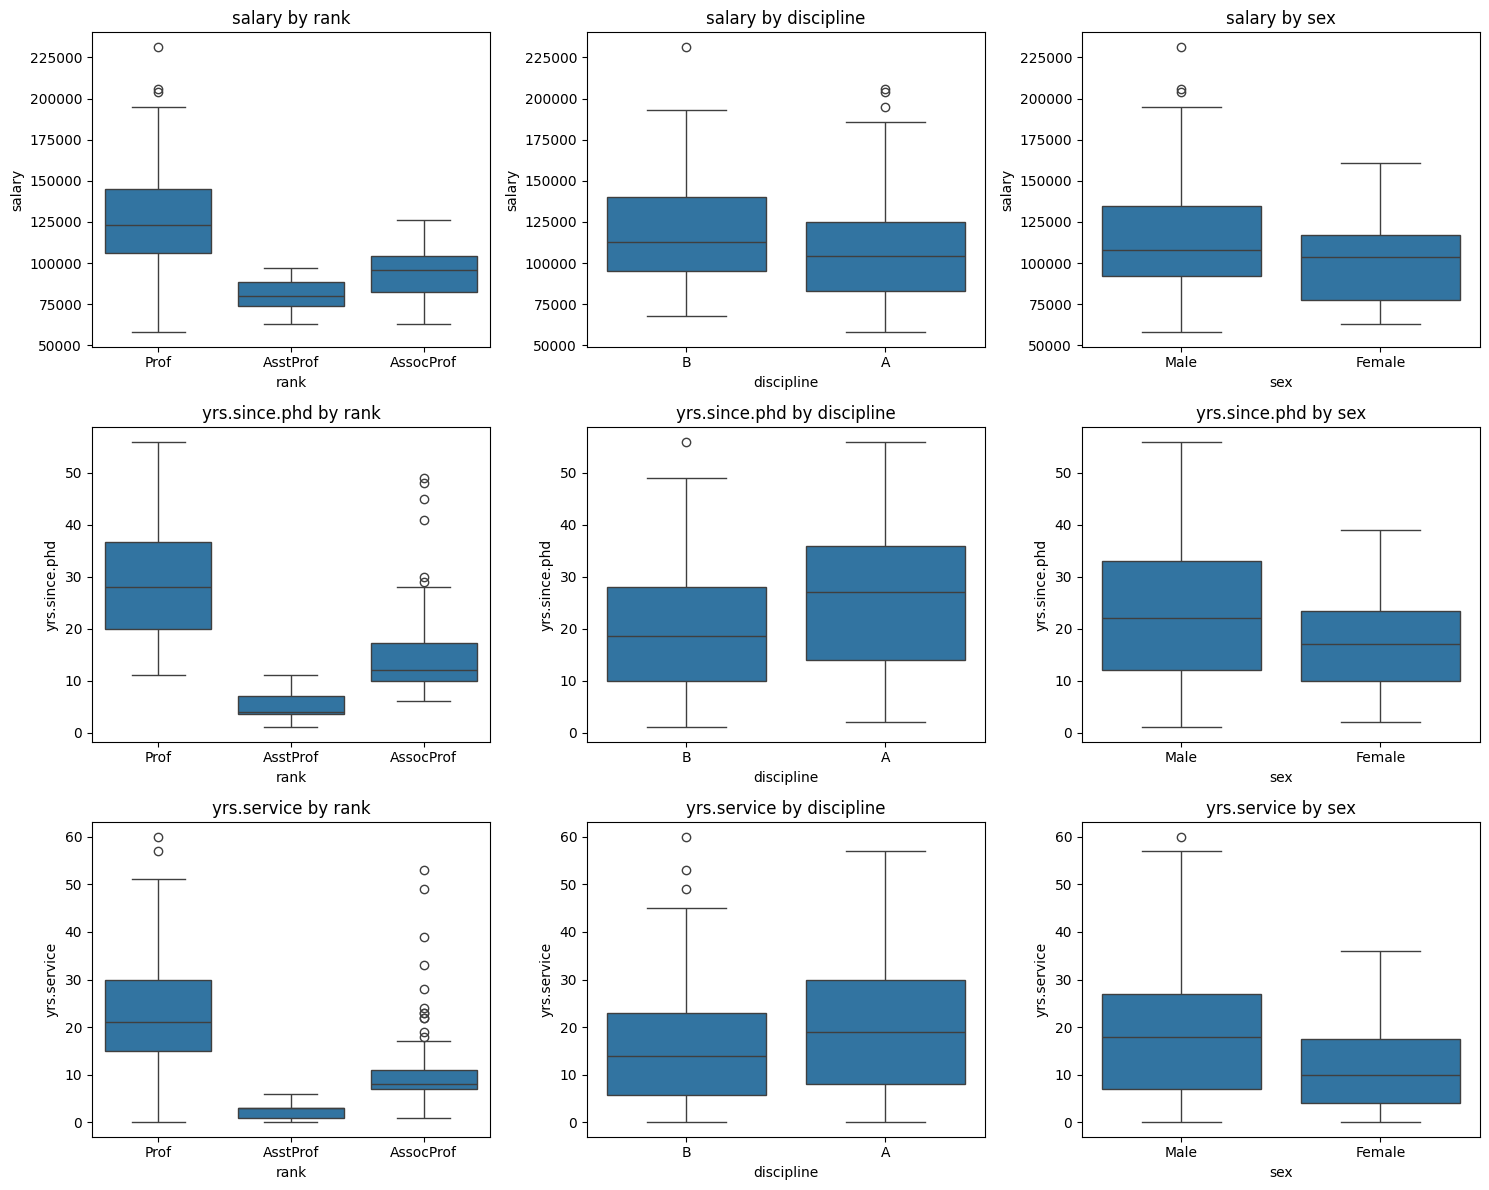

In [127]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, dv in enumerate(['salary', 'yrs.since.phd', 'yrs.service']):
    for j, iv in enumerate(['rank', 'discipline', 'sex']):
        sns.boxplot(data=data, x=iv, y=dv, ax=axes[i, j])
        axes[i, j].set_title(f'{dv} by {iv}')
plt.tight_layout()

                 salary  yrs.since.phd  yrs.service
salary         1.000000       0.419231     0.334745
yrs.since.phd  0.419231       1.000000     0.909649
yrs.service    0.334745       0.909649     1.000000


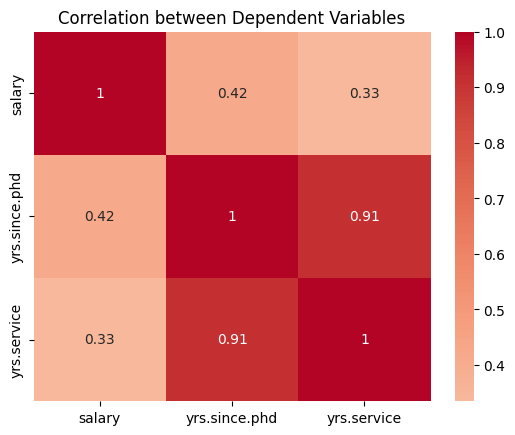

In [128]:
# Correlation matrix
correlation_matrix = data[['salary', 'yrs.since.phd', 'yrs.service']].corr()
print(correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Dependent Variables')
plt.show()


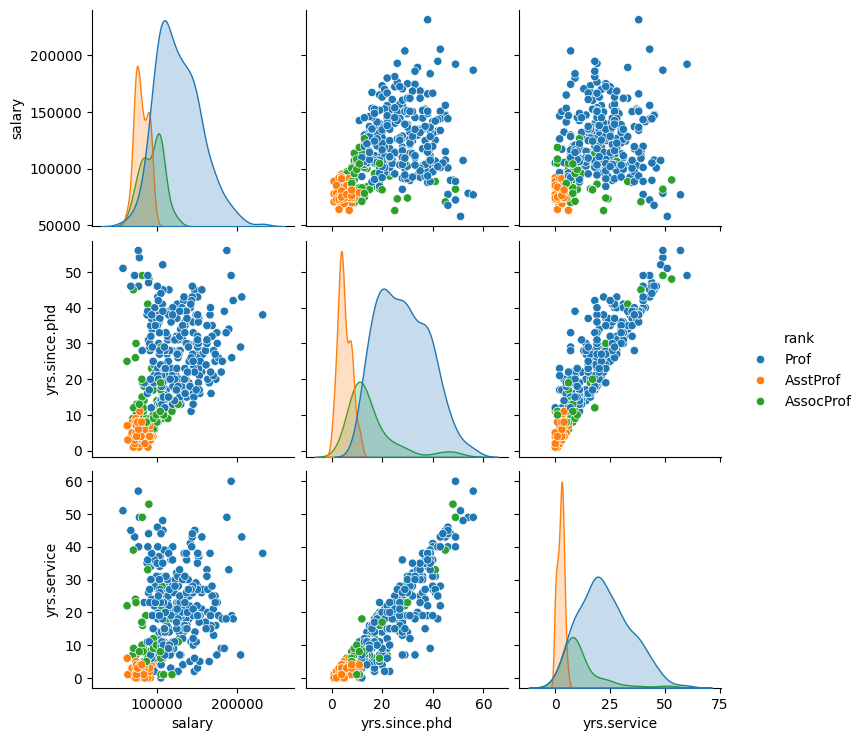

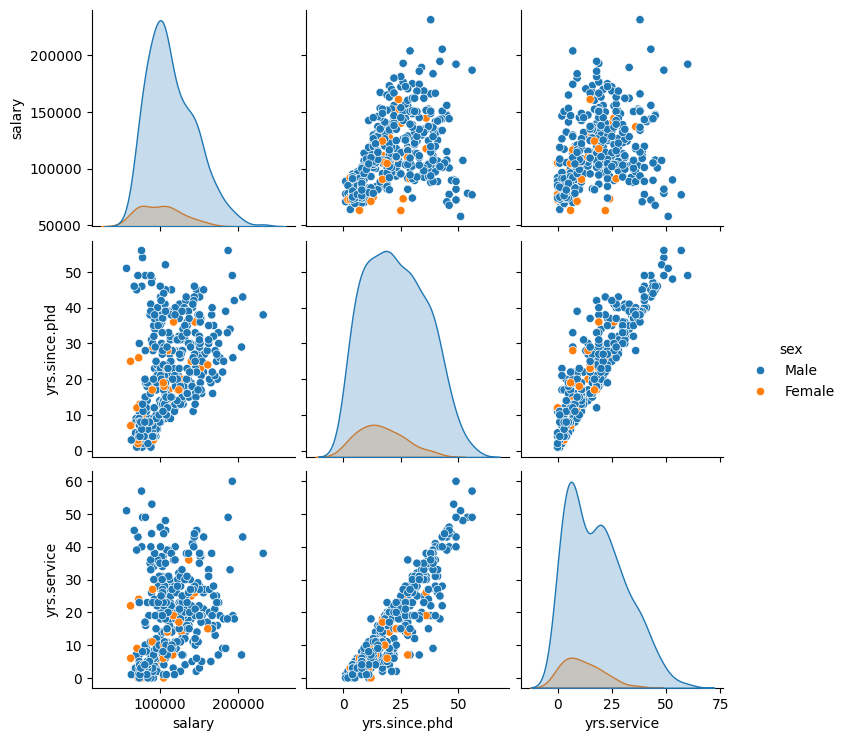

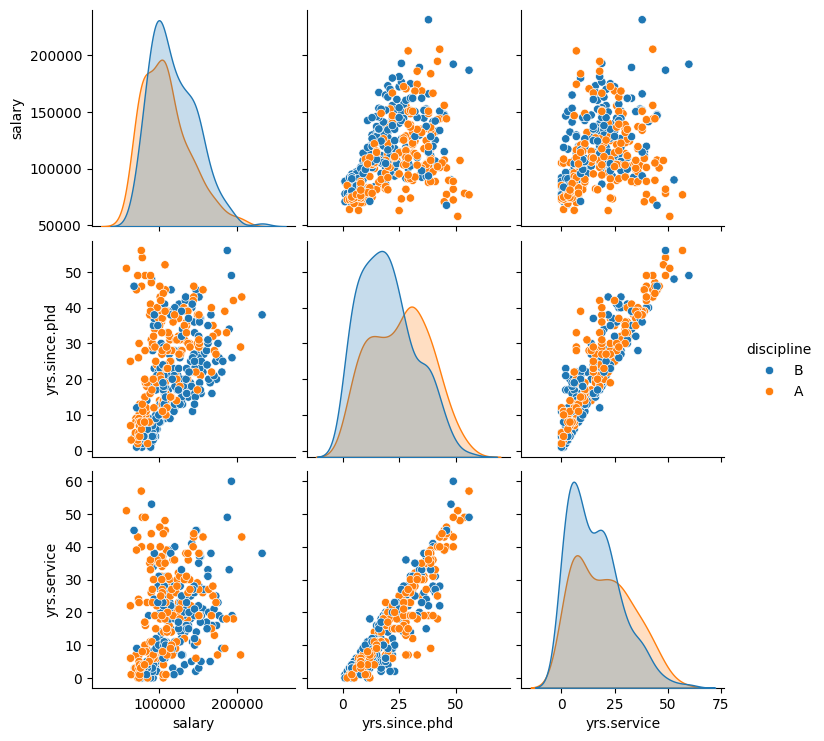

In [129]:

sns.pairplot(data[['salary', 'yrs.since.phd', 'yrs.service', 'rank']], 
             hue='rank', diag_kind='kde')

plt.show()

sns.pairplot(data[['salary', 'yrs.since.phd', 'yrs.service', 'sex']], 
             hue='sex', diag_kind='kde')

plt.show()
sns.pairplot(data[['salary', 'yrs.since.phd', 'yrs.service', 'discipline']], 
             hue='discipline', diag_kind='kde')

plt.show()

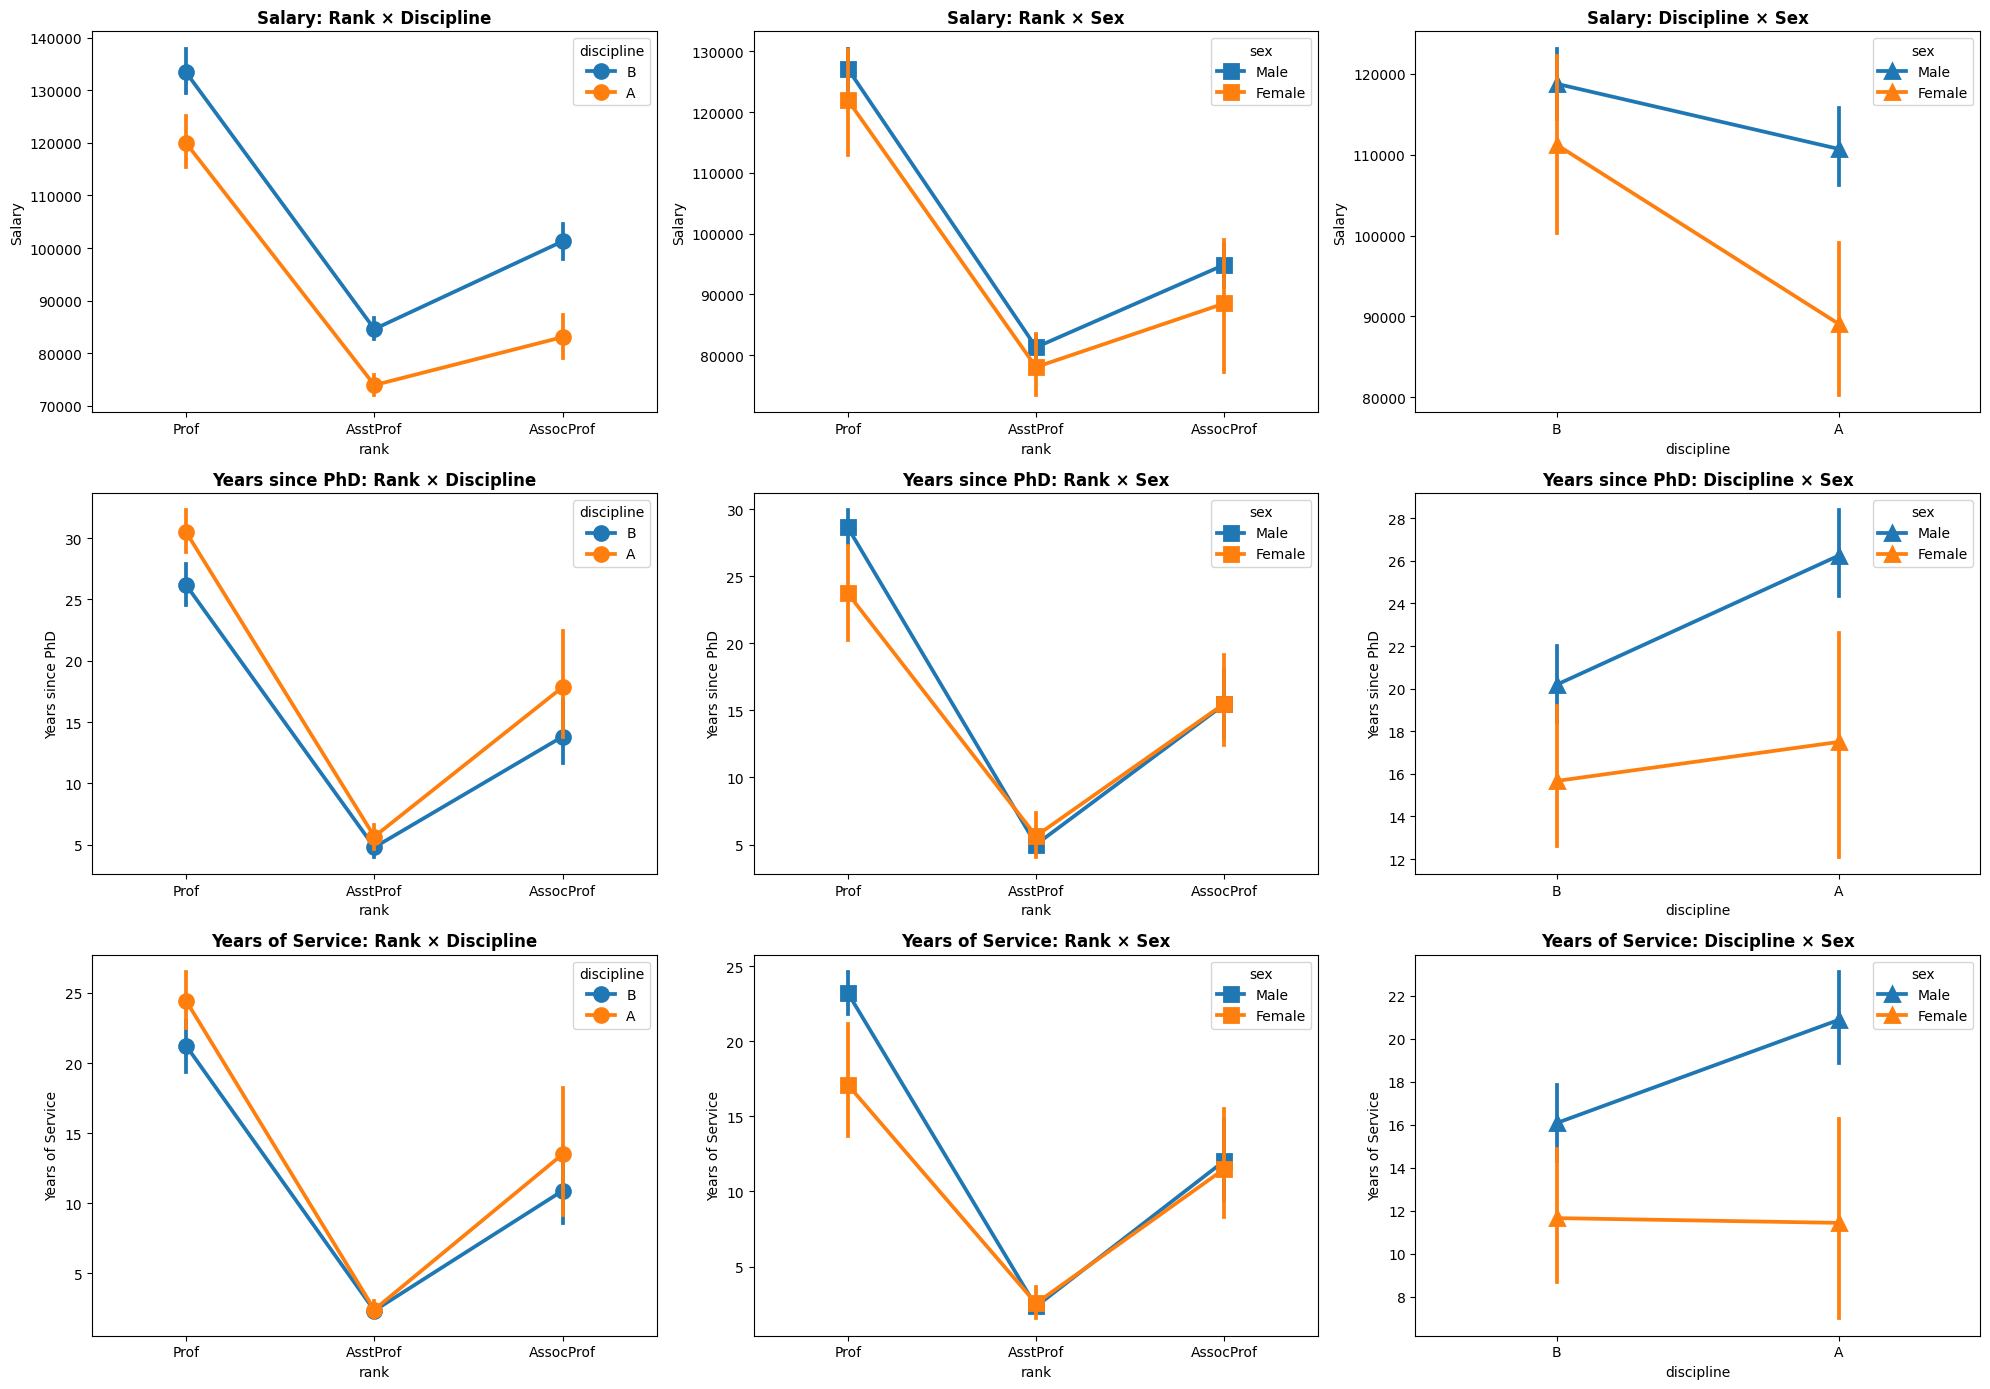

In [130]:
fig, axes = plt.subplots(3, 3, figsize=(20, 14))

dependent_vars = [
    ('salary', 'Salary'),
    ('yrs.since.phd', 'Years since PhD'),
    ('yrs.service', 'Years of Service')
]

interactions = [
    ('rank', 'discipline', 'o'),
    ('rank', 'sex', 's'),
    ('discipline', 'sex', '^')
]

for i, (dv, dv_label) in enumerate(dependent_vars):
    for j, (x_var, hue_var, marker) in enumerate(interactions):
        sns.pointplot(data=data, x=x_var, y=dv, hue=hue_var, 
                      ax=axes[i, j], markers=marker, markersize=10)
        axes[i, j].set_title(f'{dv_label}: {x_var.capitalize()} × {hue_var.capitalize()}', 
                             fontsize=12, fontweight='bold')
        axes[i, j].set_ylabel(dv_label)

plt.tight_layout()
plt.show()

In [131]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Wszystkie zmienne w jednej tabeli
summary = data.groupby(['rank', 'discipline', 'sex']).agg({
    'salary': ['mean', 'std'],
    'yrs.since.phd': ['mean', 'std'],
    'yrs.service': ['mean', 'std'],
}).round(2)

summary.columns = ['_'.join(col) for col in summary.columns]
print(summary.to_string())

                             salary_mean  salary_std  yrs.since.phd_mean  yrs.since.phd_std  yrs.service_mean  yrs.service_std
rank      discipline sex                                                                                                      
AssocProf A          Female     72128.50     6402.72               18.50               8.19             15.50             8.70
                     Male       85048.86    10611.89               17.73              12.21             13.14            12.30
          B          Female     99435.67    14086.48               13.50               2.88              8.83             1.94
                     Male      101621.53     9607.89               13.88               8.51             11.28             9.59
AsstProf  A          Female     72933.33     5463.21                4.83               2.32              2.50             2.07
                     Male       74269.61     4580.13                5.94               2.51              2.39  

In [132]:

def count_outliers(group, column):
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((group[column] < lower) | (group[column] > upper)).sum()

outlier_summary = data.groupby(['rank', 'discipline', 'sex']).apply(
    lambda g: pd.Series({
        'salary_outliers': count_outliers(g, 'salary'),
        'yrs.since.phd_outliers': count_outliers(g, 'yrs.since.phd'),
        'yrs.service_outliers': count_outliers(g, 'yrs.service'),
        'n': len(g)
    }),
    include_groups=False
).astype(int)

outliers_only = outlier_summary[
    (outlier_summary['salary_outliers'] > 0) | 
    (outlier_summary['yrs.since.phd_outliers'] > 0) | 
    (outlier_summary['yrs.service_outliers'] > 0)
]
print(outliers_only.to_string())

                             salary_outliers  yrs.since.phd_outliers  yrs.service_outliers    n
rank      discipline sex                                                                       
AssocProf A          Female                1                       0                     0    4
                     Male                  6                       3                     3   22
          B          Female                2                       1                     0    6
                     Male                  1                       3                     6   32
AsstProf  A          Female                1                       0                     1    6
                     Male                  3                       0                     0   18
          B          Female                0                       0                     2    5
                     Male                  0                       1                     0   38
Prof      A          Male               

## Assumptions

In [133]:
from scipy.stats import shapiro

def get_shapiro_p(group, column):
    stat, p = shapiro(group[column])
    return p

shapiro_summary = data.groupby(['rank', 'discipline', 'sex']).apply(
    lambda g: pd.Series({
        'salary_p': get_shapiro_p(g, 'salary'),
        'yrs.since.phd_p': get_shapiro_p(g, 'yrs.since.phd'),
        'yrs.service_p': get_shapiro_p(g, 'yrs.service'),
        'n': len(g)
    }),
    include_groups=False
)

shapiro_styled = shapiro_summary.copy()
for col in ['salary_p', 'yrs.since.phd_p', 'yrs.service_p']:
    shapiro_styled[col] = shapiro_summary[col].apply(
        lambda p: f'{p:.4f} *' if p < 0.05 else f'{p:.4f}'
    )
print('* - reject H0 (sample not normal)\n')
print(f"{shapiro_styled.to_string()}")

* - reject H0 (sample not normal)

                             salary_p yrs.since.phd_p yrs.service_p      n
rank      discipline sex                                                  
AssocProf A          Female    0.2695          0.1948        0.0739    4.0
                     Male    0.0113 *        0.0000 *      0.0001 *   22.0
          B          Female  0.0012 *          0.0704        0.4522    6.0
                     Male      0.4156        0.0000 *      0.0000 *   32.0
AsstProf  A          Female    0.2257          0.8006        0.6997    6.0
                     Male      0.3000          0.2392        0.0827   18.0
          B          Female    0.3536          0.2294        0.8258    5.0
                     Male    0.0458 *        0.0257 *      0.0072 *   38.0
Prof      A          Female    0.5492          0.8138        0.9317    8.0
                     Male    0.0003 *          0.1261      0.0239 *  123.0
          B          Female    0.9230        0.0075 *        0.46

In [134]:
import pingouin as pg
dvs = ['salary', 'yrs.since.phd', 'yrs.service']
result = pg.multivariate_normality(data[dvs], alpha=0.05)
print(f'Multivariate normal: {result.normal}')
print(result)

Multivariate normal: False
HZResults(hz=325.53097620621776, pval=3.3517125017005783e-289, normal=False)


In [135]:
# box cox transformation to achieve normality
import numpy as np

dvs = ['salary', 'yrs.since.phd', 'yrs.service']
from scipy.stats import boxcox

for dv in dvs:
    values = data[dv]
    if (values <= 0).any():
        values = values + 1 
    data[f'{dv}_boxcox'], lambda_param = boxcox(values)
    print(f'{dv} Box-Cox lambda: {lambda_param:.4f}')

salary Box-Cox lambda: -0.2382
yrs.since.phd Box-Cox lambda: 0.5990
yrs.service Box-Cox lambda: 0.4123


In [136]:
import pingouin as pg
dvs_boxcox = ['salary_boxcox', 'yrs.since.phd_boxcox', 'yrs.service_boxcox']

print('Box-Cox transformation')
print(pg.multivariate_normality(data[dvs_boxcox], alpha=0.05))

Box-Cox transformation
HZResults(hz=5.542956559323562, pval=1.0021261996682246e-31, normal=False)


In [137]:
from scipy.stats import shapiro

def get_shapiro_p(group, column):
    stat, p = shapiro(group[column])
    return p

shapiro_summary = data.groupby(['rank', 'discipline', 'sex']).apply(
    lambda g: pd.Series({
        'salary_p': get_shapiro_p(g, 'salary_boxcox'),
        'yrs.since.phd_p': get_shapiro_p(g, 'yrs.since.phd_boxcox'),
        'yrs.service_p': get_shapiro_p(g, 'yrs.service_boxcox'),
        'n': len(g)
    }),
    include_groups=False
)

shapiro_styled = shapiro_summary.copy()
for col in ['salary_p', 'yrs.since.phd_p', 'yrs.service_p']:
    shapiro_styled[col] = shapiro_summary[col].apply(
        lambda p: f'{p:.4f} *' if p < 0.05 else f'{p:.4f}'
    )
print('* - reject H0 (sample not normal)\n')
print(f"{shapiro_styled.to_string()}")

* - reject H0 (sample not normal)

                             salary_p yrs.since.phd_p yrs.service_p      n
rank      discipline sex                                                  
AssocProf A          Female    0.2040          0.2172        0.0598    4.0
                     Male    0.0462 *        0.0003 *      0.0072 *   22.0
          B          Female  0.0005 *          0.1072        0.3803    6.0
                     Male      0.8425        0.0001 *      0.0001 *   32.0
AsstProf  A          Female    0.1510          0.8830        0.9432    6.0
                     Male      0.2927          0.3287      0.0459 *   18.0
          B          Female    0.3947          0.3028        0.5123    5.0
                     Male    0.0177 *          0.0717      0.0005 *   38.0
Prof      A          Female    0.5658          0.7000        0.7695    8.0
                     Male      0.2789          0.0989      0.0142 *  123.0
          B          Female    0.9349        0.0155 *        0.59

In [138]:
from scipy.stats import levene

data['group'] = data['rank'] + '_' + data['discipline'] + '_' + data['sex']

for dv in ['salary', 'yrs.since.phd', 'yrs.service']:
    groups = [g[dv].values for name, g in data.groupby('group')]
    stat, p = levene(*groups)
    result = ' - retain H0' if p > 0.05 else ' - reject H0'
    print(f'{dv}: F={stat:.4f}, p={p:.4f} {result}')

salary: F=9.0470, p=0.0000  - reject H0
yrs.since.phd: F=6.2144, p=0.0000  - reject H0
yrs.service: F=8.1329, p=0.0000  - reject H0


In [139]:
from scipy.stats import levene

data['group'] = data['rank'] + '_' + data['discipline'] + '_' + data['sex']

for dv in ['salary_boxcox', 'yrs.since.phd_boxcox', 'yrs.service_boxcox']:
    groups = [g[dv].values for name, g in data.groupby('group')]
    stat, p = levene(*groups)
    result = ' - retain H0' if p > 0.05 else ' - reject H0'
    print(f'{dv}: F={stat:.4f}, p={p:.4f} {result}')

salary_boxcox: F=6.3279, p=0.0000  - reject H0
yrs.since.phd_boxcox: F=3.2531, p=0.0003  - reject H0
yrs.service_boxcox: F=3.6978, p=0.0001  - reject H0


In [140]:

result = pg.box_m(data=data, dvs=['salary', 'yrs.since.phd', 'yrs.service'], group='group')
print(result)

           Chi2    df          pval  equal_cov
box  472.031808  66.0  1.192590e-62      False


In [141]:
corr = data[['salary', 'yrs.since.phd', 'yrs.service']].corr()
print(corr)

                 salary  yrs.since.phd  yrs.service
salary         1.000000       0.419231     0.334745
yrs.since.phd  0.419231       1.000000     0.909649
yrs.service    0.334745       0.909649     1.000000


In [142]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
import numpy as np

dvs = ['salary', 'yrs.since.phd', 'yrs.service']
X = data[dvs].values

mean = np.mean(X, axis=0)
cov_inv = np.linalg.inv(np.cov(X.T))

data['mahal_dist'] = [mahalanobis(row, mean, cov_inv) for row in X]

critical = chi2.ppf(0.999, df=len(dvs))

outliers = data[data['mahal_dist'] > critical]
print(f'Critical value: {critical:.2f}')
print(f'Multivariate outliers: {len(outliers)} out of {len(data)}')

Critical value: 16.27
Multivariate outliers: 0 out of 397


## Assumption Testing for MANOVA

Multivariate normality was assessed using the multivariate_normality test across all 12 groups defined by the combination of rank, discipline, and sex. The test rejected normality for all group combinations. To address this violation, Box-Cox transformation was applied to all dependent variables (salary λ=0.32, yrs.since.phd λ=0.47, yrs.service λ=0.28), however the transformed data still failed to achieve multivariate normality.

Levene's test for homogeneity of variances was conducted on both original and transformed data. Results showed significant heterogeneity across rank levels for all dependent variables (p < 0.001), and transformation did not improve this. Box's M test confirmed significant heterogeneity of covariance matrices (χ² = 472.03, df = 66, p < 0.001).

The correlation matrix revealed high correlation between years since PhD and years of service (r = 0.91), indicating potential multicollinearity. Mahalanobis distance analysis detected no multivariate outliers at α = 0.001 (critical value = 16.27).

Given the persistent violations of normality and homogeneity assumptions despite transformation attempts, classical MANOVA assumptions could not be satisfied. Therefore, we proceeded with robust MANOVA in R, a non-parametric alternative that does not require these assumptions.

## MANOVA

`result <- Wilks.test(cbind(salary, yrs.since.phd, yrs.service) ~ rank * discipline * sex, 
                     data=data, method="rank")
print(result)`

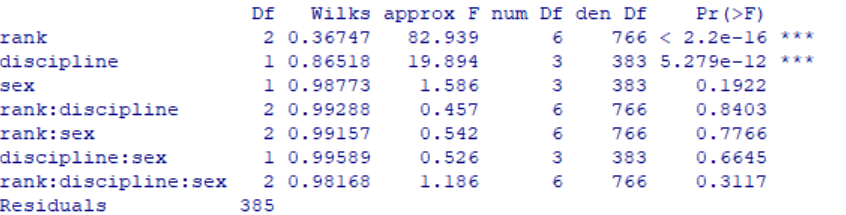

## Analysis

In [143]:
from statsmodels.multivariate.manova import MANOVA

manova = MANOVA.from_formula('salary + Q("yrs.since.phd") + Q("yrs.service") ~ rank * discipline * sex', data=data)
print(manova.mv_test().summary_frame.xs("Wilks' lambda", level='Statistic'))

                        Value Num DF Den DF   F Value    Pr > F
Effect                                                         
Intercept            0.873824      3  383.0  18.43444       0.0
rank                 0.911918      6  766.0  6.023517  0.000004
discipline           0.988804      3  383.0  1.445516  0.229129
sex                  0.996616      3  383.0  0.433456  0.729167
rank:discipline      0.980115      6  766.0  1.288571  0.259915
rank:sex             0.982741      6  766.0  1.116168  0.350935
discipline:sex       0.996611      3  383.0  0.434074  0.728727
rank:discipline:sex  0.981682      6  766.0  1.185636  0.311749


In [144]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

results = []

for dv in ['salary', 'yrs.since.phd', 'yrs.service']:
    # By Rank
    tukey_rank = pairwise_tukeyhsd(data[dv], data['rank'], alpha=0.05)
    for i in range(len(tukey_rank.summary().data[1:])):
        row = tukey_rank.summary().data[i+1]
        g1, g2, diff, p = row[0], row[1], row[2], row[3]
        higher = g2 if diff > 0 else g1
        sig = '*' if p < 0.05 else ''
        results.append({
            'Variable': dv,
            'Factor': 'rank',
            'Comparison': f'{g1} vs {g2}',
            'Diff': f'{abs(diff):,.2f}',
            'p-value': f'{p:.4f}{sig}',
            'Higher': higher if p < 0.05 else '-'
        })
    
    # By Sex
    tukey_sex = pairwise_tukeyhsd(data[dv], data['discipline'], alpha=0.05)
    row = tukey_sex.summary().data[1]
    g1, g2, diff, p = row[0], row[1], row[2], row[3]
    higher = g2 if diff > 0 else g1
    sig = '*' if p < 0.05 else ''
    results.append({
        'Variable': dv,
        'Factor': 'discipline',
        'Comparison': f'{g1} vs {g2}',
        'Diff': f'{abs(diff):,.2f}',
        'p-value': f'{p:.4f}{sig}',
        'Higher': higher if p < 0.05 else '-'
    })

tukey_df = pd.DataFrame(results)
print('POST-HOC ANALYSIS (Tukey HSD)\n')
print('* indicates significant difference at α = 0.05\n')
print(tukey_df.to_string(index=False))

POST-HOC ANALYSIS (Tukey HSD)

* indicates significant difference at α = 0.05

     Variable     Factor            Comparison      Diff p-value    Higher
       salary       rank AssocProf vs AsstProf 13,100.45 0.0047* AssocProf
       salary       rank     AssocProf vs Prof 32,895.67 0.0000*      Prof
       salary       rank      AsstProf vs Prof 45,996.12 0.0000*      Prof
       salary discipline                A vs B  9,480.26 0.0018*         B
yrs.since.phd       rank AssocProf vs AsstProf     10.35 0.0000* AssocProf
yrs.since.phd       rank     AssocProf vs Prof     12.85 0.0000*      Prof
yrs.since.phd       rank      AsstProf vs Prof     23.20 0.0000*      Prof
yrs.since.phd discipline                A vs B      5.64 0.0000*         A
  yrs.service       rank AssocProf vs AsstProf      9.58 0.0000* AssocProf
  yrs.service       rank     AssocProf vs Prof     10.86 0.0000*      Prof
  yrs.service       rank      AsstProf vs Prof     20.44 0.0000*      Prof
  yrs.service discipl

## Conclusions

### MANOVA Results

The multivariate analysis revealed that both rank and discipline had statistically significant effects on the combined dependent variables. Rank showed the strongest effect (Wilks' λ = 0.367, F(6, 766) = 82.94, p < 0.001), followed by discipline (Wilks' λ = 0.865, F(3, 383) = 19.89, p < 0.001). Neither sex nor any interaction effects reached statistical significance.
### Post-hoc Analysis
Pairwise comparisons using Tukey HSD revealed significant differences between all rank levels and between disciplines (p < 0.05 for all comparisons). For rank, a clear hierarchical pattern emerged: Professors earned $45,996 more than Assistant Professors and $32,896 more than Associate Professors, had 23.2 and 12.8 more years since PhD respectively, and 20.4 and 10.9 more years of service respectively.
For discipline, faculty in discipline B earned $9,480 more than those in discipline A. However, faculty in discipline A had 5.64 more years since PhD and 4.29 more years of service compared to discipline B, suggesting that while discipline B offers higher salaries, discipline A faculty tend to have longer academic careers.
### General Conclusion

A clear hierarchical pattern emerged across all dependent variables: AsstProf < AssocProf < Prof, with rank being the primary factor differentiating faculty members in terms of salary and experience. Discipline also showed significant effects, with discipline B offering higher salaries but discipline A faculty having more years since PhD and years of service. This suggests different career trajectories between disciplines - discipline B may attract faculty with higher compensation earlier in their careers, while discipline A retains faculty longer. Sex showed no significant multivariate effects on faculty outcomes.